## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [ ]:
%set_env HW_ID=CIS5450_F23_HW2

In [1]:
%pip install sqlalchemy==1.4.46
%pip install pandasql
%pip install geopy
%pip install -U kaleido

  Using cached SQLAlchemy-1.4.46-cp39-cp39-macosx_10_9_x86_64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39
Note: you may need to restart the kernel to use updated packages.
  Using cached pandasql-0.7.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
  Using cached geopy-2.4.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Using cached geopy-2.4.0-py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl (85.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import datetime as dt
import geopy as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import math
import re
import json
import os
from collections import Counter
import random
import numpy as np

[nltk_data] Downloading package punkt to /Users/kumarhari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

# Yelp Dataset

<br>
<center><img src = "https://static-prod.adweek.com/wp-content/uploads/2021/08/YelpLogoAugust2021.jpg" width= "500" align ="center"/></center>
<br>



I'm sure you have used Yelp when searching for good restaurants or reliable local services, and with good reason. In this homework, we'll explore Yelp's extensive datasets to gain valuable insights into businesses and users on the platform. The data we will be using includes:

* Business: data about businesses listed on Yelp
* Check-in: data about check-ins made on businesses
* Tip: data about tips that users left for each business
* User: data about each user on Yelp including friends and number of reviews

We'll be parsing this data into dataframes and relations, and then exploring how to query and assemble the tables into results. We will primarily be using PandaSQL, but for some of the initial questions, we will ask you to perform the same operations in Pandas as well, so as to familiarize you with the differences and similarities of the two.

For the final part of this homework, we'll perform some text analysis on a hotel review dataset.

## Part 1: Load & Process our Datasets [12 points total]

Before we get into the data, we first need to load and clean our datasets.

# Metadata
You'll be working with four CSV files:
- `yelp_business.csv`
- `yelp_checkin.csv`
- `yelp_tip.csv`
- `yelp_user.csv`

The file `yelp_business.csv` contains data of businesses listed on Yelp such as name, address, stars, review count, etc.

The file `yelp_checkin.csv` contains check-in data for businesses including day, hour, and number of people.

The file `yelp_tip.csv` contains tips that each user left for each business.

The file `yelp_user.csv` contains data of each user such as name, review count, friends, start date of membership, and etc.


**TODO**:
* Load `yelp_business.csv` and save the data to a dataframe called `business_df`.
* Load `yelp_checkin.csv` and save the data to a dataframe called `checkin_df`.
* Load `yelp_tip.csv` and save the data to a dataframe called `tip_df`.
* Load `yelp_user.csv` and save the data to a dataframe called `user_df`.


In [27]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly!

business_df = pd.read_csv('data/yelp_business.csv')
checkin_df = pd.read_csv('data/yelp_checkin.csv')
tip_df = pd.read_csv('data/yelp_tip.csv')
user_df = pd.read_csv('data/yelp_user.csv')

In [28]:
# TODO: view business_df (just the first 5 rows with .head() is fine) to make sure the import was successful
business_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [7]:
# TODO: view checkin_df (just the first 5 rows with .head() is fine) to make sure the import was successful
checkin_df.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [8]:
# TODO: view tip_df (just the first 5 rows with .head() is fine) to make sure the import was successful
tip_df.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [9]:
# TODO: view user_df (just the first 5 rows with .head() is fine) to make sure the import was successful
user_df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


### 1.1 Data Preprocessing

Next, we are going to want to clean up our dataframes. We will start with cleaning up `business_df`.

#### 1.1.1 Cleaning `business_df` [4 points]

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls, based on which we can now clean our dataframe.

Perform these steps and save results on a new dataframe: `business_cleaned_df`

**TODO**:
* Copy `business_df` to the new dataframe called `business_cleaned_df`
* Remove extra quotation marks from the entries in the columns `name` and `address` in `business_cleaned_df`
* Convert the column `categories` into a list of strings
* Drop `neighborhood` column from `business_cleaned_df`
* Create a column called `is_restaurant` where the value is 1 if `'Restaurants'` is in the list in column `categories` and is 0 otherwise
* Create individual rows for each category of each business instead of having a list of categories (Hint: explode)
* Sort `business_cleaned_df` by `business_id` and `categories` respectively in an ascending order and reset index as well as drop old indices
* Create a list called `business_category_list` containing all unique values found in column `categories` and sort the list in an alphabetical order

After performing these steps, `business_cleaned_df` should have the following schema:

**Final Schema**:
>business_id | name | address | city | state | postal_code | latitude | longitude | stars | review_count | is_open | categories | is_restaurant
>--- | --- | --- |--- | --- | --- | --- |--- | --- | --- |--- |--- |---

### **NOTES: MAKE SURE TO ALWAYS RESET INDEX. OTHERWISE, YOU MIGHT GET AN INTERNAL SERVER ERROR WHEN RUNNING THE TEST CASES!!!**

In [10]:
# View info of business_df
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   174567 non-null  object 
 1   name          174567 non-null  object 
 2   neighborhood  68015 non-null   object 
 3   address       174567 non-null  object 
 4   city          174566 non-null  object 
 5   state         174566 non-null  object 
 6   postal_code   173944 non-null  object 
 7   latitude      174566 non-null  float64
 8   longitude     174566 non-null  float64
 9   stars         174567 non-null  float64
 10  review_count  174567 non-null  int64  
 11  is_open       174567 non-null  int64  
 12  categories    174567 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [31]:
# TODO: Save business_df to business_cleaned_df
business_cleaned_df = business_df.copy()
business_cleaned_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [32]:
# TODO: Remove extra quotations from name and address
business_cleaned_df['name'] = business_cleaned_df['name'].replace('"', '', regex = True)
business_cleaned_df['address'] = business_cleaned_df['address'].replace('"', '', regex = True)
business_cleaned_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,NaN,3101 Washington Rd,McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,NaN,"6025 N 27th Ave, Ste 1",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,NaN,"5000 Arizona Mills Cr, Ste 435",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [33]:
# TODO: Convert categories into a list of strings
business_cleaned_df['categories'] = business_cleaned_df['categories'].str.split(";")
business_cleaned_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,NaN,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,"[Dentists, General Dentistry, Health & Medical..."
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,NaN,3101 Washington Rd,McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,"[Hair Stylists, Hair Salons, Men's Hair Salons..."
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,NaN,"6025 N 27th Ave, Ste 1",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,"[Departments of Motor Vehicles, Public Service..."
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,NaN,"5000 Arizona Mills Cr, Ste 435",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,"[Sporting Goods, Shopping]"
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,NaN,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ..."


In [34]:
# TODO: Drop neighborhood column
business_cleaned_df.drop(columns=['neighborhood'], inplace = True)

In [43]:
# TODO: Create a column called is_restaurant where the value is 1 if 'Restaurants' is within the list in the column categories and is 0 otherwise
business_cleaned_df['is_restaurant'] = business_cleaned_df['categories'].apply(lambda x: 1 if 'Restaurants' in x else 0)
business_cleaned_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,is_restaurant
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,"[Dentists, General Dentistry, Health & Medical...",0
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,3101 Washington Rd,McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,"[Hair Stylists, Hair Salons, Men's Hair Salons...",0
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,"6025 N 27th Ave, Ste 1",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,"[Departments of Motor Vehicles, Public Service...",0
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,"5000 Arizona Mills Cr, Ste 435",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,"[Sporting Goods, Shopping]",0
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",1


In [48]:
# TODO: Create individual rows for each category of each business (Hint: explode)
business_cleaned_df = business_cleaned_df.explode('categories').rename(columns={'categories': 'category'})
business_cleaned_df.reset_index(drop = True, inplace = True)
business_cleaned_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category,is_restaurant
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists,0
1,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,General Dentistry,0
2,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Health & Medical,0
3,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Oral Surgeons,0
4,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Cosmetic Dentists,0


In [54]:
# TODO: Sort business_id and categories by ascending order

business_cleaned_df.sort_values(by = ['business_id', 'category'], ascending = [True, True], inplace = True)
business_cleaned_df.reset_index(drop = True, inplace = True)
business_cleaned_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category,is_restaurant
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.840905,-79.399604,3.0,37,1,Chinese,1
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.840905,-79.399604,3.0,37,1,Restaurants,1
2,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,16432 Old Statesville Rd,Huntersville,NC,28078,35.437086,-80.843688,4.0,47,1,Breweries,0
3,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,16432 Old Statesville Rd,Huntersville,NC,28078,35.437086,-80.843688,4.0,47,1,Food,0
4,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.379509,-111.728394,4.5,3,1,Doctors,0


In [59]:
# TODO: Create a list called business_category_list containing all unique values found in column categories and sort the list in an alphabetical order
business_category_list = business_cleaned_df['category'].unique().tolist()
business_category_list.sort()
business_category_list[0:5]

['& Probates', '3D Printing', 'ATV Rentals/Tours', 'Acai Bowls', 'Accessories']

#### 1.1.2 Cleaning `checkin_df` [3 points]

We will inspect `checkin_df` through the following steps:

**TODO**:
* Save `checkin_df` to the new dataframe called `checkin_cleaned_df`
* Inspect the values in `weekday` column. Store the number of unique values for the column `weekday` in the variable called `weekday_count_checkin`
* Inspect the values in `hour` column. Store the number of unique values for the column `hour` in the variable called `hour_count_checkin`
* We would like to know the maximum number of check-ins received by a business in the dataframe. Store this value in the variable called `max_checkin_single`

After performing these steps, `checkin_cleaned_df` should have the following schema (should be the same as `checkin_df`):

**Final Schema**:
>business_id | weekday | hour | checkins
>--- | --- | --- |---

In [361]:
# View info of checkin_df
checkin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911218 entries, 0 to 3911217
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   weekday      object
 2   hour         object
 3   checkins     int64 
dtypes: int64(1), object(3)
memory usage: 119.4+ MB


In [362]:
# TODO: Save checkin_df to checkin_cleaned_df
checkin_cleaned_df = checkin_df.copy()

In [363]:
# TODO: Store the number of unique values for the column weekday in the variable called weekday_count_checkin
weekday_count_checkin = checkin_cleaned_df['weekday'].nunique()
weekday_count_checkin

7

In [364]:
checkin_cleaned_df.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [341]:
# TODO: Store the number of unique values for the column hour in the variable called hour_count_checkin
hour_count_checkin = checkin_cleaned_df['hour'].nunique()
hour_count_checkin

24

In [301]:
# TODO: Store the maximum number of check-ins for a single business in the variable called max_checkin_single
max_checkin_single = checkin_cleaned_df['checkins'].max()
max_checkin_single

1478

#### 1.1.3 Cleaning `tip_df` [2 points]

We will clean `tip_df` through the following steps:

**TODO**:
* Save `tip_df` to the new dataframe called `tip_cleaned_df`
* Drop all rows with NA
* Convert the data type in `date` column from string to `datetime64[ns]` (Use default format: `'%Y-%m-%d'`)
* Sort `tip_cleaned_df` by `business_id` and `user_id` in an ascending order and reset index

After performing these steps, `tip_cleaned_df` should have the following schema (should be the same as `tip_df`):

**Final Schema**:
>text | date | likes | business_id | user_id
>--- | --- | --- |--- |---

In [72]:
# View info of tip_df
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098324 entries, 0 to 1098323
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   text         1098322 non-null  object
 1   date         1098324 non-null  object
 2   likes        1098324 non-null  int64 
 3   business_id  1098324 non-null  object
 4   user_id      1098324 non-null  object
dtypes: int64(1), object(4)
memory usage: 41.9+ MB


In [73]:
# TODO: Save tip_df to tip_cleaned_df
tip_cleaned_df = tip_df.copy()

In [74]:
# TODO: Drop rows with NA
tip_cleaned_df.dropna(inplace = True)
tip_cleaned_df.head(3)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ


In [78]:
# TODO: Convert the data in date column from string to datetime64[ns]
tip_cleaned_df['date'] = tip_cleaned_df['date'].astype('datetime64[ns]')
tip_cleaned_df.dtypes

text                   object
date           datetime64[ns]
likes                   int64
business_id            object
user_id                object
dtype: object

In [80]:
# TODO: Sort tip_cleaned_df by business_id in an ascending order and reset index
tip_cleaned_df.sort_values(by = 'business_id', ascending = True, inplace = True)
tip_cleaned_df.reset_index(drop = True, inplace = True)
tip_cleaned_df.head(3)


,text,date,likes,business_id,user_id
0,"$7.50 lunch special, dish of rice\/noodles wit...",2017-01-15,0,--6MefnULPED_I942VcFNA,0cUzu82KJiE5_xZA0Iu3ZQ
1,$5 lunch special,2014-07-11,0,--6MefnULPED_I942VcFNA,2oMkzQcRL7-d7URt3Xo_Xg
2,Their lunch combos for small groups is a decen...,2013-01-29,0,--6MefnULPED_I942VcFNA,Tc3GAQdAfOW542ROdyCZPg


#### 1.1.4 Cleaning `user_df` [3 points]

To understand what each column means, please refer to [this documentation](https://www.yelp.com/dataset/documentation/main) (Note that the original datasets were in JSON format).

Perform these steps and save results on a new dataframe: `user_cleaned_df`

**TODO**:
* Save `user_df` to the new dataframe called `user_cleaned_df`
* Create a column called `has_friend` which contains a value of 1 if the user has at least 1 friends and contains a value of 0 otherwise
* Drop unwanted columns so we only have the following columns in `user_cleaned_df`: `user_id, name, review_count, yelping_since, friends, elite, average_stars, has_friend`
* Sort `user_cleaned_df` by `user_id` in an ascending order and reset index

After performing these steps, `user_cleaned_df` should have the following schema:

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend
>--- | --- | --- |--- | --- | --- |--- |---


**Notes:**
* Do not convert the `friends` column into a list of strings since the table is very large, and performing such an operation could lead to a depletion of your RAM. We will address this column later, but only on a smaller subset of the table.
* `'friends'` column is of type string, and `'None'` should not be interpreted as `NA` but rather a string `'None'`

In [81]:
# View info of user_df
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325603 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             1326100 non-null  object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               1326100 non-null  object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

In [82]:
# TODO: Save user_df to user_cleaned_df
user_cleaned_df = user_df.copy()
user_cleaned_df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [89]:
# TODO: Create a column called has_friend which contains a value of 1 if the user has friends and 0 otherwise
user_cleaned_df['has_friend'] = np.where(user_cleaned_df['friends'] == "None", 0, 1)
user_cleaned_df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,has_friend
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,1
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,1,0,0


In [91]:
# TODO: Drop unwanted columns
user_cleaned_df = user_cleaned_df[['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'elite', 'average_stars', 'has_friend']]
user_cleaned_df.sample(5)

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
1066704,rYx0XeQekgZhSKhJLcnzbQ,Debra,116,2012-08-26,"wRB4ydleVCuCHDS8kIIkNg, 3L1miYPZ0k2cQTjptyKSKw...","2017, 2016",4.04,1
497393,G8eJa9qB2hT4Tb_nxmsf8Q,Dawn,13,2011-06-11,None,None,4.15,0
938129,PFITqBJ1x3BVPu7K-XflKg,Jessy,13,2014-11-06,"Uy7eQtM3gCx6pM8GZrMiag, PwT94dWad8G3uMp-YYoA1A...",None,4.62,1
658415,I3blQOcLPSyr8cCuOvW8YA,Minh,2,2014-06-29,6lpIQtxdiOo143oY90axiQ,None,3.00,1
336429,SChp39oaDaOhdoCVk4DAUA,Lily,141,2012-01-29,"EW5Xf4NVT9lKfLDG88ysyg, iLjMdZi0Tm7DQxX1C1_2dg...",None,3.29,1


In [92]:
# TODO: Sort by user_id in an ascending order
user_cleaned_df.sort_values(by = 'user_id', ascending = True, inplace = True)
user_cleaned_df.head(3)

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
889088,---1lKK3aKOuomHnwAkAow,Monera,246,2007-06-04,"Z3UUg88bC1-QGzjZzgRLdg, qRGOB5vpWKGDP7DFXFDmsA...","2010, 2013, 2011, 2012",3.96,1
991728,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27,"idji1BbkbDRgvaQjcpFPyw, 1zUT77mFPGl7RH_Yyzjr0A...",None,5.00,1
1045182,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31,None,None,4.00,0


## Part 2: Exploring the Data with PandasSQL (and Pandas) [74 points total]

Now that you are familiar (or still unfamiliar) with the dataset, we will now introduce you to SQL, or more specifically **pandasql**: a package created to allow users to query pandas DataFrames with SQL statements.

**Notes: Please note that in this part, the questions are not necessarily ordered by increasing difficulty, i.e., the first question may not necessarily be the easiest, and the difficulty level may vary.**

## 👇👇👇 IMPORTANT: Pay VERY CLOSE attention to this style guide! 👇👇👇

The typical flow to use pandasql (aliased as `ps`) is as follows:
1. Write a SQL query in the form of a string
    - **String Syntax:** use triple quotes `"""<your query>"""` to write multi-line strings
    - **Aliases are your friend:** if there are very long table names or you find yourself needed to declare the source (common during join tasks), it's almost always optimal to alias your tables with short INTUITIVE alias names
    - **New Clauses New Line:** each of the main SQL clauses (`SELECT`, `FROM`, `WHERE`, etc.) should begin on a new line
    - **Use Indentation:** if there are many components for a single clause, separate them out with new <ins>indented</ins> lines.

    Example below:
    ```SQL
    """
    SELECT ltn.some_id, SUM(stn.some_value) AS total
    FROM long_table_name AS ltn
         INNER JOIN short_table_name AS stn
            ON ltn.common_key = stn.common_key
         INNER JOIN med_table_name AS mtn
            ON ltn.other_key = mtn.other_key
    WHERE ltn.col1 > value
         AND stn.col2 <= another_value
         AND mtn.col3 != something_else
    GROUP BY ltn.some_id
    ORDER BY total
    """
    ```
2. Run the query using **ps.sqldf(your_query, locals())**

Pandasql is convenient in that it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes that you have created above!

Given that it is a brand new language, we wanted to give you a chance to directly compare the similarities/differences of the pandas that you already know and the SQL that you are about to learn. Thus, for each of the simpler queries, we may ask that you **look into the question twice: once with pandas and once with pandasql**. The SQL queries may take a minute to run, don't worry that is normal!

### 2.1 Location, Location, Location [22 points]

In the world of real estate, the phrase "location, location, location" has long been a mantra, emphasizing the importance of where a property is situated. Surprisingly, this mantra holds true not just for real estate but also for the culinary world. When it comes to restaurants, location can make or break a business. In this analysis, we're going to take a deep dive into the intersection of restaurants and their locations.

#### 2.1.1 What are the cities with the most restaurants? [6 points]

The dataframe `business_cleaned_df` contains information of each business. We want to know the top 10 cities with the most **unique** restaurants. Note that we can distinguish restaurants by their `business_id`, i.e., `business_id` are unique to each restaurant.

**TODO:**

* Use `pandas` to find top 10 cities in the `city` and `state` column with the most restaurants. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average stars of restaurants in each city in the column called `average_stars`
* Order the resulting dataframe by the total number of restaurants, `restaurant_count`, in descending order
* Save the result as `most_res_df` and don't forget to reset index

**Final Schema**:
>city | state | restaurant_count | average_stars
>--- | --- | --- |---

**Hint:**
* There are two indicators whether the business is a restaurant or not:
    * `is_restaurant` equals `1`
    * `categories` equals `'Restaurants'`
* Think about how we cleaned `business_df` to figure out the best way to filter the restaurants!

In [96]:
# TODO: Use SQL to find top 10 cities (including state) with the most restaurants. Also include average stars
top_10_cities_query = """ 

SELECT 
city,
state,
COUNT(DISTINCT(business_id)) as restaurant_count,
AVG(stars) as average_stars
FROM business_cleaned_df
WHERE category = "Restaurants" AND is_restaurant = 1
GROUP BY city, state
ORDER BY COUNT(DISTINCT(business_id)) desc
LIMIT 10
"""

most_res_df = ps.sqldf(top_10_cities_query, locals())

In [97]:
most_res_df

,city,state,restaurant_count,average_stars
0,Toronto,ON,7148,3.423475
1,Las Vegas,NV,5899,3.458044
2,Phoenix,AZ,3647,3.429805
3,Montréal,QC,3332,3.684874
4,Charlotte,NC,2460,3.388618
5,Pittsburgh,PA,2207,3.507703
6,Scottsdale,AZ,1451,3.605789
7,Edinburgh,EDH,1427,3.813245
8,Cleveland,OH,1364,3.463710
9,Mississauga,ON,1304,3.351994


**TODO:**
* Now, use `pandasql` to find top 10 cities with the most restaurants
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

**WARNING: DO NOT USE PANDAS FOR ALL SQL QUESTIONS! OTHERWISE, YOU WON'T RECEIVE CREDITS FOR ALL SQL QUESTIONS**

In [105]:
# TODO: Use pandas to find top 10 cities (including state) with the most restaurants. Also include average stars

most_res_df_pandas = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['category'] == 'Restaurants')].groupby(['city', 'state'])\
    .agg(restaurant_count = ('business_id', 'size'), average_stars = ('stars', 'mean'))

most_res_df_pandas.sort_values(by = 'restaurant_count', ascending = False, inplace = True)
most_res_df_pandas = most_res_df_pandas.head(10)
most_res_df_pandas

,,restaurant_count,average_stars
city,state,,
Toronto,ON,7148,3.423475
Las Vegas,NV,5899,3.458044
Phoenix,AZ,3647,3.429805
Montréal,QC,3332,3.684874
Charlotte,NC,2460,3.388618
Pittsburgh,PA,2207,3.507703
Scottsdale,AZ,1451,3.605789
Edinburgh,EDH,1427,3.813245
Cleveland,OH,1364,3.463710


#### 2.1.2 Which cities have the highest average check-ins per restaurant? [8 points]

The dataframe `checkin_cleaned_df` contains check-in information for each business. We want to know the top 15 cities with the highest average check-ins per restaurant.

**TODO:**

* Use `pandas` to find top 15 cities in the `city` and `state` column with the highest average check-ins per restaurant. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average check-ins per restaurant in each city in the column called `avg_checkins`
* Order the resulting dataframe by `avg_checkins` in descending order
* Save the result as `most_checkin_df` and don't forget to reset index

**Notes:**
* Only consider businesses with check-in data in `checkin_cleaned_df`. Do not include businesses with no check-in data in the average.
* One `business_id` can appear in more than one row in `business_cleaned_df` and `checkin_cleaned_df`. Think about how we can filter restaurants from other types of business without taking duplicates.

**Final Schema**:
>city | state | avg_checkins
>--- | --- | ---

In [132]:
checkins_per_business = checkin_cleaned_df.groupby('business_id').agg(total_checkins = ('checkins', 'sum')).reset_index()
checkins_per_business

,business_id,total_checkins
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153
2,--8LPVSo5i0Oo61X01sV9A,1
3,--9QQLMTbFzLJ_oT-ON3Xw,33
4,--9e1ONYQuAa-CB_Rrw7Tw,2568
...,...,...
146345,zzvlwkcNR1CCqOPXwuvz2A,2
146346,zzwaS0xn1MVEPEf0hNLjew,716
146347,zzwhN7x37nyjP0ZM8oiHmw,33
146348,zzwicjPC9g246MK2M1ZFBA,127


In [133]:
# TODO: Use pandas to find 15 cities (including state) with highest average checkins per restaurant

business_by_checkins = pd.merge(business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['category'] == 'Restaurants')], checkins_per_business, how = 'inner', on = 'business_id')

most_checkin_df = business_by_checkins.groupby(['city', 'state']).agg(avg_checkins = ('total_checkins', 'mean')).round(1).reset_index()
most_checkin_df.sort_values(by = 'avg_checkins', ascending = False, inplace = True)
most_checkin_df.reset_index(drop = True, inplace = True)
most_checkin_df = most_checkin_df.head(15)
most_checkin_df

,city,state,avg_checkins
0,Scottdale,AZ,1080.0
1,Summerlin,NV,1076.0
2,South Las Vegas,NV,807.5
3,Woodmere Village,OH,625.0
4,Robinson,PA,611.0
5,Las Vegas,NV,572.6
6,Lower Lawrenceville,PA,565.0
7,N. Las Vegas,NV,545.5
8,Scottsdale,AZ,541.2
9,Enterprise,NV,474.5


**TODO:**
* Now, use `pandasql` to find top 15 cities with the highest average check-ins per restaurant
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

In [136]:
# TODO: Use SQL to find 15 cities (including state) with highest average checkins per restaurant
most_checkin_query = '''

WITH checkins_per_business as (
SELECT
business_id,
SUM(checkins) as total_checkins
FROM checkin_cleaned_df
GROUP BY business_id)

SELECT 
city,
state,
ROUND(AVG(total_checkins), 1) as avg_checkins
FROM business_cleaned_df b
INNER JOIN checkins_per_business c
ON b.business_id = c.business_id
WHERE b.is_restaurant = 1 AND b.category = "Restaurants"
GROUP BY city, state
ORDER BY AVG(total_checkins) DESC
LIMIT 15

'''
most_checkin_df_sql = ps.sqldf(most_checkin_query, locals())
most_checkin_df_sql.head(15)

,city,state,avg_checkins
0,Scottdale,AZ,1080.0
1,Summerlin,NV,1076.0
2,South Las Vegas,NV,807.5
3,Woodmere Village,OH,625.0
4,Robinson,PA,611.0
5,Las Vegas,NV,572.6
6,Lower Lawrenceville,PA,565.0
7,N. Las Vegas,NV,545.5
8,Scottsdale,AZ,541.2
9,Enterprise,NV,474.5


#### 2.1.3 Which states have the most popular Thai restaurants? [8 points]
We would like to know which state has the most popular Thai restaurants, which we will gauge using the number of reviews.

**TODO:**
* Use `business_cleaned_df` to find Thai restaurants with the highest `review_count` for each state
* The resulting dataframe should include the `state` and `city` in which the restaurant is located, the `name` of the restaurant, the number of reviews in the `max_review` column, and the `stars` of the restaurant
* If there are more than one Thai restaurants in the same state with the maximum number of reviews, include all of them in the resulting dataframe
* Save the result as `popular_thai_df` and don't forget to reset index
* Finally, order the resulting dataframe by `max_review` in a descending order and `name` in an ascending order respectively


**Final Schema**:
>state | city | name | max_review | stars
>--- | --- | --- | --- | ---

In [144]:
# TODO: Use pandas to find Thai restaurants with highest review count for each state

popular_thai_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['category'] == 'Thai')]
popular_thai_df['state_rank'] = popular_thai_df.groupby(['state'])['review_count'].rank(method = 'min', ascending = False)
popular_thai_df = popular_thai_df[popular_thai_df['state_rank'] == 1.0][['state', 'city', 'name', 'review_count', 'stars']]
popular_thai_df.rename(columns = {'review_count' : 'max_review'}, inplace = True)
popular_thai_df.sort_values(by = ['max_review', 'name'], ascending = [False, True], inplace = True)
popular_thai_df.reset_index(drop = True, inplace = True)
popular_thai_df.head()

/var/folders/v1/m30v1vjj41364h_5p8jgmr0h0000gn/T/ipykernel_48779/3228216873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_thai_df['state_rank'] = popular_thai_df.groupby(['state'])['review_count'].rank(method = 'min', ascending = False)


,state,city,name,max_review,stars
0,NV,Las Vegas,Lotus of Siam,3964,4.0
1,ON,Toronto,Pai Northern Thai Kitchen,1494,4.5
2,PA,Pittsburgh,Noodlehead,820,4.5
3,AZ,Phoenix,Clever Koi,689,4.0
4,WI,Madison,Ha Long Bay Vietnamese & Thai Bistro,580,4.0


**TODO:**
* Now, use `pandasql` to find Thai restaurants with highest review count for each state
* The result should be saved as `popular_thai_df_sql` and should be the same as the result from `pandas`

In [150]:
# TODO: Use SQL to find Thai restaurants with highest review count for each state
popular_thai_query = '''

WITH state_ranker as (
SELECT state,
city,
name,
review_count AS max_review,
stars,
DENSE_RANK() OVER (PARTITION BY state ORDER BY review_count DESC) as state_rank
FROM business_cleaned_df 
WHERE is_restaurant = 1 AND category = 'Thai'
)
SELECT state, city, name, max_review, stars
FROM state_ranker
WHERE state_rank = 1
ORDER BY max_review DESC, name ASC

'''
popular_thai_df_sql = ps.sqldf(popular_thai_query, locals())
popular_thai_df_sql.head()

,state,city,name,max_review,stars
0,NV,Las Vegas,Lotus of Siam,3964,4.0
1,ON,Toronto,Pai Northern Thai Kitchen,1494,4.5
2,PA,Pittsburgh,Noodlehead,820,4.5
3,AZ,Phoenix,Clever Koi,689,4.0
4,WI,Madison,Ha Long Bay Vietnamese & Thai Bistro,580,4.0


###2.2 Best Time to Visit Restaurant [14 points]

#### 2.2.1 Finding restaurants  [6 points]

After working hard on this course, you were able to find a summer internship position in Phoenix, AZ. You want to explore food places and you decided to start with Italian restaurants. We will use `business_cleaned_df` to find the top 10 Italian restaurant in Phoenix, AZ that has the highest `review_count`.

**TODO** (`pandas`):
* Filter the `business_cleaned_df` on the given conditions.
* Keep only `business_id`,`name`, `stars`, `review_count`, and `categories` for the final dataframe
* Sort by the `review_count` descending order

**Final Schema**:
>business_id | name | stars | review_count | categories
>--- | --- | --- | --- | ---

In [152]:
# TODO: Finding restaurants
best_italian_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['category'] == 'Italian')]
best_italian_df = best_italian_df[(best_italian_df['city'] == 'Phoenix') & (best_italian_df['state'] == 'AZ')]
best_italian_df.sort_values(by = 'review_count', ascending = False, inplace = True)
best_italian_df.reset_index(drop = True, inplace = True)
best_italian_df = best_italian_df.head(10)
best_italian_df = best_italian_df[['business_id', 'name', 'stars', 'review_count', 'category']]
best_italian_df


,business_id,name,stars,review_count,category
0,pSQFynH1VxkfSmehRXlZWw,Pizzeria Bianco,4.0,2035,Italian
1,9a3DrZvpYxVs3k_qwlCNSw,Cibo,4.5,1698,Italian
2,u-SJ5QUwrNquL9VnXwl8cg,Postino Arcadia,4.5,1186,Italian
3,k1QpHAkzKTrFYfk6u--VgQ,The Parlor,4.0,1081,Italian
4,fT6Uwl6abRQfiNgxre_qbg,Cherryblossom Noodle Cafe,4.0,946,Italian
5,FogTa-wmjhVnJCoTiaxvZA,Postino Central,4.5,940,Italian
6,N8uKQ5Vdb1LAh-qXT_25Rg,Lou Malnati's Pizzeria,4.0,792,Italian
7,Tw3miGKZHtmxmaQZIYFRrA,Federal Pizza,4.5,762,Italian
8,7cK9uEV09iPmsTqOqmY3kQ,La Grande Orange Pizzeria,4.5,743,Italian
9,ElWzx5_fU8S2G45OnM-HpA,Ocotillo,4.0,603,Italian


**TO-DO** : Repeat the same using `business_cleaned_df` (only for this sql query) and `pandasql`, saving it as `best_italian_df_sql`.


In [154]:
# TODO: Use SQL to find top 10 Italian restaurants with highest review count in Pheonix, AZ
best_italian_df_query = '''

SELECT business_id,
name,
stars,
review_count,
category
FROM business_cleaned_df
WHERE city = "Phoenix" AND state = "AZ" AND is_restaurant = 1 AND category = "Italian"
ORDER BY review_count DESC
LIMIT 10
'''
best_italian_df_sql = ps.sqldf(best_italian_df_query, locals())
best_italian_df_sql.head(10)

,business_id,name,stars,review_count,category
0,pSQFynH1VxkfSmehRXlZWw,Pizzeria Bianco,4.0,2035,Italian
1,9a3DrZvpYxVs3k_qwlCNSw,Cibo,4.5,1698,Italian
2,u-SJ5QUwrNquL9VnXwl8cg,Postino Arcadia,4.5,1186,Italian
3,k1QpHAkzKTrFYfk6u--VgQ,The Parlor,4.0,1081,Italian
4,fT6Uwl6abRQfiNgxre_qbg,Cherryblossom Noodle Cafe,4.0,946,Italian
5,FogTa-wmjhVnJCoTiaxvZA,Postino Central,4.5,940,Italian
6,N8uKQ5Vdb1LAh-qXT_25Rg,Lou Malnati's Pizzeria,4.0,792,Italian
7,Tw3miGKZHtmxmaQZIYFRrA,Federal Pizza,4.5,762,Italian
8,7cK9uEV09iPmsTqOqmY3kQ,La Grande Orange Pizzeria,4.5,743,Italian
9,ElWzx5_fU8S2G45OnM-HpA,Ocotillo,4.0,603,Italian


#### 2.2.2 Avoid Restaurant Traffic  [8 points]

You visited one of the Italian restaurants from the 2.2.1 list. But, you weren't able to find a table to seat because the restaurant was very crowded at the time of your visit. Now, you want to try Burgers instead and want to find a better time to visit so you don't have to wait.

* Use `business_cleaned_df` and to find the top 5 Burgers restaurant by review counts in Phoenix, AZ.

* `checkin_cleaned_df` will be used to find the number of check-ins at specific day and hour.

* Keep only the rows that have less than 5 checkins at given day and hour

**Final Schema**:
>name | address | city | state | stars | review_count | categories | weekday | hour | checkins
>--- | --- | --- | ---  | --- | --- | --- | --- | --- | ---

In [167]:
# TODO: Avoid Restaurant Traffic
best_burgers_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['category'] == 'Burgers')]
best_burgers_df = best_burgers_df[(best_burgers_df['city'] == 'Phoenix') & (best_burgers_df['state'] == 'AZ')]
best_burgers_df = pd.merge(best_burgers_df, checkin_cleaned_df, how = 'inner', on = 'business_id')
best_burgers_df = best_burgers_df[best_burgers_df['checkins'] < 5]
best_burgers_df['rank_by_hour'] = best_burgers_df.groupby(['weekday', 'hour'])['review_count'].rank(method = 'min', ascending = False)
best_burgers_df = best_burgers_df[best_burgers_df['rank_by_hour'] < 6]
best_burgers_df.sort_values(by = ['weekday', 'hour', 'rank_by_hour'], ascending = [True, True, True], inplace = True)
best_burgers_df.reset_index(drop = True, inplace = True)
best_burgers_df = best_burgers_df[['name', 'address', 'city', 'state', 'review_count', 'category', 'weekday', 'hour', 'checkins']]
best_burgers_df.head()

,name,address,city,state,review_count,category,weekday,hour,checkins
0,Original Breakfast House,13623 N 32nd St,Phoenix,AZ,1097,Burgers,Fri,0:00,1
1,Shake Shack,"100 E Camelback Rd, Ste 100",Phoenix,AZ,324,Burgers,Fri,0:00,3
2,5 & Diner,5220 N 16th St,Phoenix,AZ,249,Burgers,Fri,0:00,3
3,Ranch House Grille,5618 E Thomas Rd,Phoenix,AZ,238,Burgers,Fri,0:00,1
4,The Counter Phoenix,50 N Central Ave,Phoenix,AZ,225,Burgers,Fri,0:00,2


**TODO:**
* Now, use `pandasql` to find the top 5 Burgers restaurants in Phoenix, AZ with less than 5 check-ins.
* The result should be saved as `best_burgers_sql` and should be the same as the result from `pandas`

In [169]:
# TODO: Use SQL to find the number of checkins that are less than 5 for
# top 5 Burgers restaurants with highest review count
best_burgers_query = '''

with joined as (
SELECT 

b.name,
b.address,
b.city,
b.state,
b.review_count,
b.category,
c.weekday,
c.hour,
c.checkins,
DENSE_RANK() OVER (PARTITION BY weekday, hour ORDER BY review_count DESC) as rank_by_hour
FROM business_cleaned_df b
INNER JOIN
checkin_cleaned_df c
ON b.business_id = c.business_id
WHERE b.city = "Phoenix" AND b.state = "AZ" AND b.is_restaurant = 1 AND b.category = "Burgers" AND c.checkins < 5)

SELECT *
FROM joined
WHERE rank_by_hour < 6
ORDER BY weekday ASC, hour ASC, rank_by_hour ASC
'''
best_burgers_sql = ps.sqldf(best_burgers_query, locals())
best_burgers_sql.head()

,name,address,city,state,review_count,category,weekday,hour,checkins,rank_by_hour
0,Original Breakfast House,13623 N 32nd St,Phoenix,AZ,1097,Burgers,Fri,0:00,1,1
1,Shake Shack,"100 E Camelback Rd, Ste 100",Phoenix,AZ,324,Burgers,Fri,0:00,3,2
2,5 & Diner,5220 N 16th St,Phoenix,AZ,249,Burgers,Fri,0:00,3,3
3,Ranch House Grille,5618 E Thomas Rd,Phoenix,AZ,238,Burgers,Fri,0:00,1,4
4,The Counter Phoenix,50 N Central Ave,Phoenix,AZ,225,Burgers,Fri,0:00,2,5


###2.3 Avid Yelpers [22 points]
In this section we'll be taking a deeper dive into `user_cleaned_df`. We'll be focusing on Yelp users who are particularly active! In this digital age, even Yelp has a friends/follower count 😲. Let's see who's friends with who, and who reigns supreme on the newest social media platform -- Yelp!




#### 2.3.1 Elite Yelp Reviewers [6 points]

Use `user_cleaned_df` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.

**TODO:**
* Filter for the above characteristics
* Sort the dataframe by `review_count` in descending order, then by `yelping_since` in ascending order
* Reset index
* Save the resulting dataframe as `elite_user_df`

**NOTE:**

* Beware of the datatype of `elite` when dealing with not elite users

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend |
>--- | --- | --- | ---  | --- | --- | --- | --- |

In [194]:
# TODO: Use pandas to find elite yelp reviewers
user_cleaned_df.head()
elite_user_df = user_cleaned_df[(user_cleaned_df['has_friend'] == 1) & (user_cleaned_df['review_count'] >= 2000)]
elite_user_df.sort_values(by = ['review_count', 'yelping_since'], ascending = [False, True], inplace = True)
elite_user_df.reset_index(drop = True, inplace = True)
elite_user_df.head()

/var/folders/v1/m30v1vjj41364h_5p8jgmr0h0000gn/T/ipykernel_48779/1226292546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elite_user_df.sort_values(by = ['review_count', 'yelping_since'], ascending = [False, True], inplace = True)


,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA...","2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
1,RtGqdDBvvBCjcu5dUqwfzA,Shila,11323,2010-10-17,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw...","2013, 2017, 2012, 2014, 2015, 2016",3.82,1
2,P5bUL3Engv-2z6kKohB6qQ,Kim,9788,2006-05-31,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ...","2009, 2007, 2016, 2017, 2012, 2006, 2010, 2015...",3.80,1
3,hWDybu_KvYLSdEFzGrniTw,Bruce,8353,2009-03-08,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w...","2015, 2017, 2013, 2014, 2012, 2011, 2010, 2016",3.58,1
4,8RcEwGrFIgkt9WQ35E6SnQ,George,7764,2009-11-06,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ...","2010, 2011, 2012",3.49,1


**TODO:**
* Now, use `pandasql` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.
* The result should be saved as `elite_user_df_sql` and should be the same as the result from `pandas`

In [174]:
## TODO: Use SQL to find elite yelp reviewers
elite_user_query = '''

SELECT
*
FROM user_cleaned_df
WHERE has_friend = 1 and review_count >= 2000
ORDER BY review_count DESC, yelping_since ASC
'''
elite_user_df_sql = ps.sqldf(elite_user_query, locals())
elite_user_df_sql.head()

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA...","2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
1,RtGqdDBvvBCjcu5dUqwfzA,Shila,11323,2010-10-17,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw...","2013, 2017, 2012, 2014, 2015, 2016",3.82,1
2,P5bUL3Engv-2z6kKohB6qQ,Kim,9788,2006-05-31,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ...","2009, 2007, 2016, 2017, 2012, 2006, 2010, 2015...",3.80,1
3,hWDybu_KvYLSdEFzGrniTw,Bruce,8353,2009-03-08,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w...","2015, 2017, 2013, 2014, 2012, 2011, 2010, 2016",3.58,1
4,8RcEwGrFIgkt9WQ35E6SnQ,George,7764,2009-11-06,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ...","2010, 2011, 2012",3.49,1


#### 2.3.2 Joining Users' Friends  [8 points]

We now want to find the friends of all the elite users. Before we do any analysis, let's clean up the `friends` column.

**TODO:**

*   Use `elite_user_df` and create a new row for each friend an elite user has (hint split the strings then explode, make sure there is no trailing whitespace)
*   This modified `elite_user_df` will be used for the rest of 2.3.2



In [196]:
# TODO: Explode the friends column of elite_user_df
elite_user_df['friends'] = elite_user_df['friends'].str.split(',\s*')

elite_user_df = elite_user_df.explode('friends')
elite_user_df.reset_index(drop = True, inplace = True)
elite_user_df.head()

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,aD_6VD26GtfxnIPYsFbrKw,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
1,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,d-aK1cdK-xrTdog-BXeRxA,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
2,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,g23ack7_zNsXaC_vxQHXYQ,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
3,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,VuWCFQVSyH87J4UKK1IlbQ,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
4,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,VWdnGFOkKZT87jUm5s9ArA,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1


Now we will merge the friends' information in pandas.

**TODO:**

* Use `elite_user_df` and `user_cleaned_df` to join the friends' `name` and `average_stars`

* Keep the elite user's `user_id`, `name`, and `average_stars`. You can drop all other columns

* Rename the friend columns to `user_id_friend`, `name_friend`, and `average_stars_friend` (hint: check out the parameters of merge)
* Sort the dataframe by `user_id` ascending, then by `user_id_friend` ascending
* Save the resulting dataframe as `friends_df`

**Final Schema**:
>user_id | name | average_stars | user_id_friend | name_friend | average_stars_friend |
>--- | --- | --- | ---  | --- |--- |

In [210]:
# TODO: Use pandas to join elite yelp reviewers' friends

friends_df = pd.merge(elite_user_df, user_cleaned_df, how = 'inner', left_on = 'friends', right_on = 'user_id')
friends_df.rename(columns = {"user_id_x": "user_id", "name_x": "name", "average_stars_x": "average_stars", "user_id_y": "user_id_friend", "name_y": "name_friend", "average_stars_y": "average_stars_friend"}, inplace = True)
friends_df = friends_df[['user_id', 'name', 'average_stars', 'user_id_friend', 'name_friend', 'average_stars_friend']]
friends_df.sort_values(by = ['user_id', 'user_id_friend'], ascending = [True, True], inplace = True)
friends_df.reset_index(drop = True, inplace = True)

friends_df


,user_id,name,average_stars,user_id_friend,name_friend,average_stars_friend
0,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1MF2tosrw2WcCxeVNk81Q,Anson,3.73
1,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1q-_Iiatk5KEd-WHJdGCQ,Shelley,3.71
2,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-OZPBHH7RzyPIai4AlPWKA,Leo,3.82
3,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-RGgPpj05cxxcVVq28rIXg,Dave,3.62
4,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-WNUoT-OsSqkaseEh5k_sg,Katrina,3.67
...,...,...,...,...,...,...
134776,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,z10WysUiI6nIxJbmlzCQXw,Michelle,4.03
134777,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zDfiRc0RW8vMmqWnbDrr7w,Ron,3.34
134778,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zKDOOt3fuMUpD0mt8F_1FA,Paul,3.78
134779,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zZkUkK9M0v02qHBCCm5zaA,Mr F G And Ms M,3.81


**TODO:**
* Now, use `pandasql` to merge elite users' friends' information
* The result should be saved as `friends_df_sql` and should be the same as the result from `pandas`

In [211]:
# TODO: Use SQL to join elite yelp reviewers' friends
friends_join_query = '''

SELECT 
e.user_id, e.name, e.average_stars,
u.user_id as user_id_friend,
u.name as name_friend,
u.average_stars as average_stars_friend
FROM elite_user_df e
INNER JOIN
user_cleaned_df u
ON e.friends = u.user_id
ORDER BY e.user_id ASC, u.user_id ASC
'''
friends_df_sql = ps.sqldf(friends_join_query, locals())
friends_df_sql.head()

,user_id,name,average_stars,user_id_friend,name_friend,average_stars_friend
0,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1MF2tosrw2WcCxeVNk81Q,Anson,3.73
1,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1q-_Iiatk5KEd-WHJdGCQ,Shelley,3.71
2,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-OZPBHH7RzyPIai4AlPWKA,Leo,3.82
3,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-RGgPpj05cxxcVVq28rIXg,Dave,3.62
4,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-WNUoT-OsSqkaseEh5k_sg,Katrina,3.67


#### 2.3.3 Do Friends Think Alike?  [8 points]

Now that we joined all of the elite users' friends, we want to compare their average ratings. Let's take a look at the difference between elite users' average stars and the average of all their friends' stars.

**TODO:**
* Use `friends_df` to calculate the difference between each elite user's `average_stars` and the average of all of their friends' `average_stars` (`average_stars` - `average_stars_friend`). Name this column `average_stars_diff`

* Save the results in `stars_diff_df`. Keep only the `user_id` and `average_stars_diff` columns.

**Final Schema**:
>user_id | average_stars_diff |
>--- | --- |

In [221]:
# TODO: Use pandas to calculate the difference in average_stars amongst a user and their friends

stars_diff_df = friends_df.copy()
stars_diff_df = stars_diff_df.groupby(['user_id', 'average_stars']).agg(average_stars_tot = ('average_stars_friend', 'mean')).round(2).reset_index()
stars_diff_df['average_stars_diff'] = stars_diff_df['average_stars'] - stars_diff_df['average_stars_tot']
stars_diff_df = stars_diff_df[['user_id', 'average_stars_diff']]
stars_diff_df.head()

,user_id,average_stars_diff
0,-G7Zkl1wIWBBmD0KRy_sCw,-0.22
1,08mOpJRCpZe3D8UHszP4FA,-0.43
2,0G-bcpdR48tfZy6koGUiTQ,-0.15
3,0Igx-a1wAstiBDerGxXk2A,0.20
4,0QeJC2inz6P-OVzROU_LNw,0.16


**TODO:**
* Now, use `pandasql` to to calculate the difference in `average_stars` amongst a user and their friends
* The result should be saved as `stars_diff_df_sql` and should be the same as the result from `pandas`

In [225]:
# TODO: Use SQL to calculate the difference in average_stars amongst a user and their friends
stars_diff_query = '''

WITH by_uid as (
SELECT 
user_id,
average_stars,
AVG(average_stars_friend) as average_stars_tot
FROM friends_df
GROUP BY user_id, average_stars)

SELECT user_id,
ROUND((average_stars - average_stars_tot), 2) as average_stars_diff
FROM by_uid

'''
stars_diff_df_sql = ps.sqldf(stars_diff_query, locals())
stars_diff_df_sql.head()

,user_id,average_stars_diff
0,-G7Zkl1wIWBBmD0KRy_sCw,-0.22
1,08mOpJRCpZe3D8UHszP4FA,-0.43
2,0G-bcpdR48tfZy6koGUiTQ,-0.15
3,0Igx-a1wAstiBDerGxXk2A,0.20
4,0QeJC2inz6P-OVzROU_LNw,0.16


###2.4 Restaurant Reviews [16 points]
In this section we'll take a look at Yelp restaurant reviews. Who leaves these comments? What type of restaurants get the most reviews? Stay tuned.




#### 2.4.1 Are reviewers on average positive or negative?  [8 points]

Do people who leave **restaurant** reviews tend to be on average pessimistic or optimistic? Critical or soft? Let's take a look at the `average_stars` of users who leave Yelp reviews.

**TODO:**
* Use `tip_cleaned_df`,  `business_cleaned_df`, and `user_cleaned_df` to calculate the average rating of all Yelp reviewers in the dataset who have left a tip/review on a restaurant.
* Make sure each user only appears once in the dataframe.

* Save the results in `average_rating_tip_df`. This will be a one column, one row dataframe.

**Final Schema**:
>average_stars |
>--- |

In [246]:
# TODO: Use pandas to calculate the average ratings of users who leave Yelp reviews

average_rating_tip_df = pd.merge(user_cleaned_df[['user_id', 'average_stars']], tip_cleaned_df[['user_id', 'business_id']], how = 'inner', on = 'user_id')
average_rating_tip_df = pd.merge(average_rating_tip_df, business_cleaned_df[business_cleaned_df['is_restaurant'] == 1], how = 'inner', on = 'business_id')
average_rating_tip_df.drop_duplicates(subset = ['user_id'], inplace = True)
average_rating_tip_df = pd.DataFrame({'average_stars': [average_rating_tip_df['average_stars'].mean()]}) 

average_rating_tip_df


,average_stars
0,3.782817


**TODO:**
* Now, use `pandasql` to to calculate the average ratings of users who leave Yelp reviews on restaurants
* The result should be saved as `average_rating_tip_df_sql` and should be the same as the result from `pandas`

(Don't worry this will take a minute).

In [251]:
# TODO: Use SQL to calculate the average ratings of users who leave Yelp reviews
average_rating_tip_query = '''

with users as (
SELECT
u.user_id,
u.average_stars,
ROW_NUMBER() OVER (PARTITION BY u.user_id) as row_num
FROM
user_cleaned_df u
INNER JOIN tip_cleaned_df t
ON u.user_id = t.user_id
INNER JOIN business_cleaned_df b
ON t.business_id = b.business_id
WHERE b.is_restaurant = 1)
SELECT 
AVG(average_stars) as average_stars
FROM users
WHERE row_num = 1
'''
average_rating_tip_df_sql = ps.sqldf(average_rating_tip_query, locals())
average_rating_tip_df_sql

,average_stars
0,3.782817


#### 2.4.2 What type of restuarants get the most reviews in January?  [8 points]

We want to find out which restaurant categories get the most reviews in January across all years.

**TODO:**
* Use `tip_cleaned_df` and `business_cleaned_df` to find the count of reviews for each category
* Keep the categories that have more than 100 reviews
* Sort the dataframe descending by count
* Save the results in `category_tip_df`

**Note:**
* Some categoties with the restaurant tag may not seem related-- that's okay.
* Take a look at [this documentation](https://docs.python.org/3/library/datetime.html) for help with datetime objects


**Final Schema**:
>categories |count |
>--- |--- |

In [252]:
tip_cleaned_df.head()

,text,date,likes,business_id,user_id
0,"$7.50 lunch special, dish of rice\/noodles wit...",2017-01-15,0,--6MefnULPED_I942VcFNA,0cUzu82KJiE5_xZA0Iu3ZQ
1,$5 lunch special,2014-07-11,0,--6MefnULPED_I942VcFNA,2oMkzQcRL7-d7URt3Xo_Xg
2,Their lunch combos for small groups is a decen...,2013-01-29,0,--6MefnULPED_I942VcFNA,Tc3GAQdAfOW542ROdyCZPg
3,They only take cash.,2014-06-15,0,--6MefnULPED_I942VcFNA,Md9s_mb8Dxsl5MbjIp-DjQ
4,BBQ pork is sold out early on Saturday,2013-03-23,0,--6MefnULPED_I942VcFNA,EiP1OFgs-XGcKZux0OKWIA


In [253]:
business_cleaned_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category,is_restaurant
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.840905,-79.399604,3.0,37,1,Chinese,1
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.840905,-79.399604,3.0,37,1,Restaurants,1
2,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,16432 Old Statesville Rd,Huntersville,NC,28078,35.437086,-80.843688,4.0,47,1,Breweries,0
3,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,16432 Old Statesville Rd,Huntersville,NC,28078,35.437086,-80.843688,4.0,47,1,Food,0
4,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.379509,-111.728394,4.5,3,1,Doctors,0


In [265]:
# TODO: Use pandas to calculate the count of restaurant reviews in January by category

category_tip_df = pd.merge(tip_cleaned_df[['date', 'business_id']], business_cleaned_df[['business_id', 'category']], how = 'inner', on = 'business_id')
category_tip_df = category_tip_df[category_tip_df['date'].dt.month == 1]
category_tip_df = category_tip_df.groupby('category').agg(count = ('date', 'size')).reset_index()
category_tip_df = category_tip_df[category_tip_df['count'] > 100]
category_tip_df.sort_values(by = 'count', ascending = False, inplace = True)
category_tip_df.reset_index(drop = True, inplace = True)
category_tip_df.head()

,category,count
0,Restaurants,53473
1,Food,18515
2,Nightlife,14283
3,Bars,13089
4,American (Traditional),8801


**TODO:**
* Now, use `pandasql` to to calculate the count of restaurant reviews in January
* The result should be saved as `category_tip_df_sql` and should be the same as the result from `pandas`
* Hint: Try using the strftime function

In [270]:
# TODO: Use SQL to calculate the count of reviews in January by category
category_tip_query = '''

WITH jan_reviews as (
SELECT 
t.date,
t.business_id,
b.category
FROM tip_cleaned_df t
INNER JOIN business_cleaned_df b
ON t.business_id = b.business_id
WHERE strftime('%m', t.date) = '01'),
grouped_categories as (
SELECT 
category,
COUNT(date) as count
FROM jan_reviews
GROUP BY category)
SELECT category,
count
FROM grouped_categories
WHERE count > 100
ORDER BY count DESC

'''
category_tip_df_sql = ps.sqldf(category_tip_query, locals())
category_tip_df_sql.head()

,category,count
0,Restaurants,53473
1,Food,18515
2,Nightlife,14283
3,Bars,13089
4,American (Traditional),8801


## Part 3: Data Visualization [6 points total - manually graded]

You've done great work so far! Now let's create a couple visualizations to illustrate data we might be interested in.


This section will be **manually graded**.

Begin by following the directions below to prepare the dataset for plotting

In [313]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

For this part we will be using ``checkin_cleaned_df``

In [373]:
# Step 1 - using datetime functions, create a column called 'Time of Day' that has the time
# (Hour:Minute) seen in the hour column

# HINT: The date should be of type %H:%M, and once you've converted to datetime
# you can use the .time() function to get the time of day

checkin_cleaned_df.head()

checkin_cleaned_df['Time of Day'] = pd.to_datetime(checkin_cleaned_df['hour'], format = '%H:%M').dt.time

checkin_cleaned_df.head()

,business_id,weekday,hour,checkins,Time of Day
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12,00:00:00
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4,00:00:00
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1,14:00:00
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1,19:00:00
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1,17:00:00


In [374]:
# Step 2 - Using the 'weekday' column, create a column called 'Day' which has the day
# associated with the date (Monday, Tuesday, ..., Sunday). You can discard the
# 'weekday' column once you're done.

# Hint: You can try to come up with a way to map an abbreviated word to its full word.

# Mon represents Monday, Tue represents Tuesday, ... , Sun represents Sunday

# Use a lambda function to apply the mapping

day_map = {'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday', 'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday'}

checkin_cleaned_df['Day'] = checkin_cleaned_df['weekday'].map(day_map)

checkin_cleaned_df.head()

,business_id,weekday,hour,checkins,Time of Day,Day
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12,00:00:00,Tuesday
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4,00:00:00,Wednesday
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1,14:00:00,Tuesday
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1,19:00:00,Friday
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1,17:00:00,Tuesday


In [375]:
# Step 3 - Make a dataframe that just contains 'business_id', 'checkins', 'Time of Day', and 'Day'

checkin_cleaned_df = checkin_cleaned_df[['business_id', 'checkins', 'Time of Day', 'Day']]
checkin_cleaned_df = checkin_cleaned_df.sort_values(by='Time of Day')
checkin_cleaned_df.reset_index(drop= True, inplace = True)
checkin_cleaned_df.head()

,business_id,checkins,Time of Day,Day
0,3Mc-LxcqeguOXOVT_2ZtCg,12,00:00:00,Tuesday
1,FHZSKty-49xp2t8pF7YJ3g,3,00:00:00,Thursday
2,rN3gHTjqx5sOnoUpJ-6jyg,2,00:00:00,Wednesday
3,y3A7FES84gb85UxTTTQ_Xw,2,00:00:00,Thursday
4,jSanrWAljnkRBj92o2Qzog,1,00:00:00,Sunday


Your dataset is now complete! For the first line plot, you will be visualizing the number of trips that occur during each hour of the day, for all 7 days. To do so, you will be creating 2 line charts using Seaborn (sns).

### This is important: using only Matplotlib will NOT result in full credit

It is crucial that **your first line graph** contains the following features:
1. The X-axis should be labelled "Time of Day", is of type datetime and ranges from 00:00 (midnight) to 23:00 (11 pm)
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of Restaurants for each Hour of Day"
4. There are 7 lines for each day of the week, clearly labeled and differentiated, **containing markers**.
5. Again, must be completed using Seaborn (sns)


In [345]:
checkin_cleaned_df.head()

,business_id,checkins,Time of Day,Day
0,3Mc-LxcqeguOXOVT_2ZtCg,12,00:00:00,Tuesday
1,FHZSKty-49xp2t8pF7YJ3g,3,00:00:00,Thursday
2,rN3gHTjqx5sOnoUpJ-6jyg,2,00:00:00,Wednesday
3,y3A7FES84gb85UxTTTQ_Xw,2,00:00:00,Thursday
4,jSanrWAljnkRBj92o2Qzog,1,00:00:00,Sunday


In [349]:
checkin_cleaned_df['Time of Day'] = pd.to_datetime(checkin_cleaned_df['Time of Day'], format='%H:%M:%S').dt.time
avg_checkins = checkin_cleaned_df.groupby(['Time of Day', 'Day']).checkins.mean().reset_index()
avg_checkins.head()

,Time of Day,Day,checkins
0,00:00:00,Friday,4.387564
1,00:00:00,Monday,5.033157
2,00:00:00,Saturday,5.140642
3,00:00:00,Sunday,5.458818
4,00:00:00,Thursday,4.335842


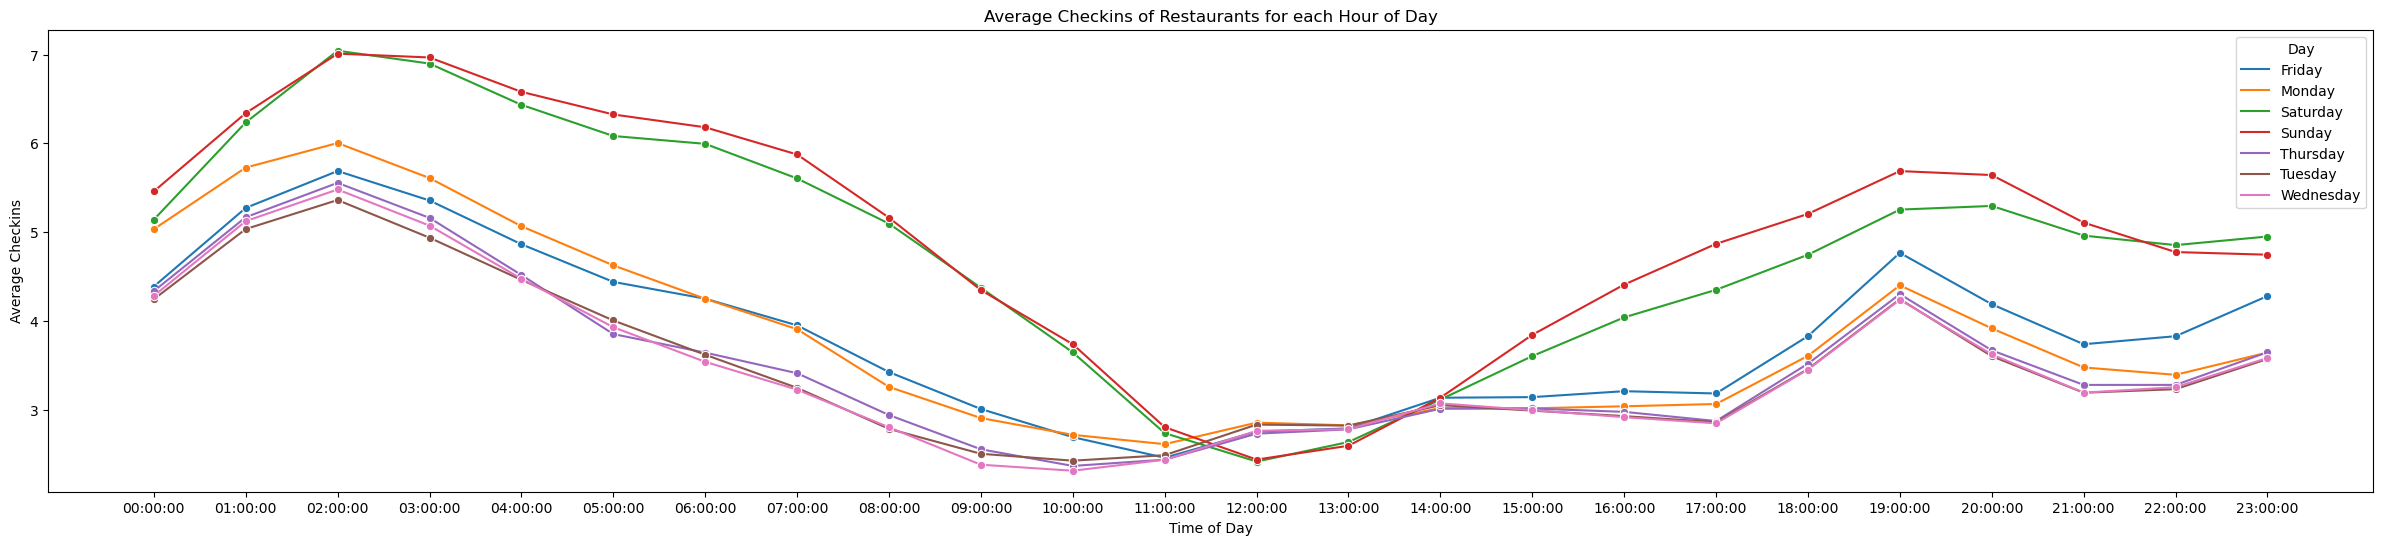

In [369]:
# First Plot:

# Use the dataframe you generated from the previous step
avg_checkins['Time of Day'] = avg_checkins['Time of Day'].astype(str)

plt.figure(figsize=(30, 6))
sns.lineplot(data=avg_checkins, 
             x='Time of Day', 
             y='checkins', 
             hue='Day', 
             marker='o',
             ci = None)

plt.title('Average Checkins of Restaurants for each Hour of Day')
plt.ylabel('Average Checkins')
plt.xlabel('Time of Day')

# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'day', 'Time of Day', 'Average Checkins'. Average Checkins is the mean checkins
# for the particular hour of that day.


# Now just plot the graph
plt.show()

In [372]:
checkin_cleaned_df.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


Now merge with `checkins2` with `business_cleaned_df` to find the average of checkins each hours of day (`Time of Day`) to visit the American restaurant.

For this part, you will need to clean `business_cleaned_df` to keep stores that are restaurant and category is American (New).

As a reminder, **your second line graph** should contain the following features:
1. The X-axis should be the same as last time
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of American (New) Restaurants for each Hour of Day"
4. There are 7 lines for each of the 7 days

In [376]:
plot2_df = pd.merge(checkin_cleaned_df, business_cleaned_df[(business_cleaned_df['category'] == "American (New)")], how = 'inner', on = 'business_id')
plot2_df['Time of Day'] = pd.to_datetime(plot2_df['Time of Day'], format='%H:%M:%S').dt.time
plot2_df = plot2_df.groupby(['Time of Day', 'Day']).checkins.mean().reset_index()
plot2_df.head()


,Time of Day,Day,checkins
0,00:00:00,Friday,8.471191
1,00:00:00,Monday,8.941802
2,00:00:00,Saturday,10.855151
3,00:00:00,Sunday,10.809901
4,00:00:00,Thursday,8.095694


Text(0.5, 0, 'Time of Day')

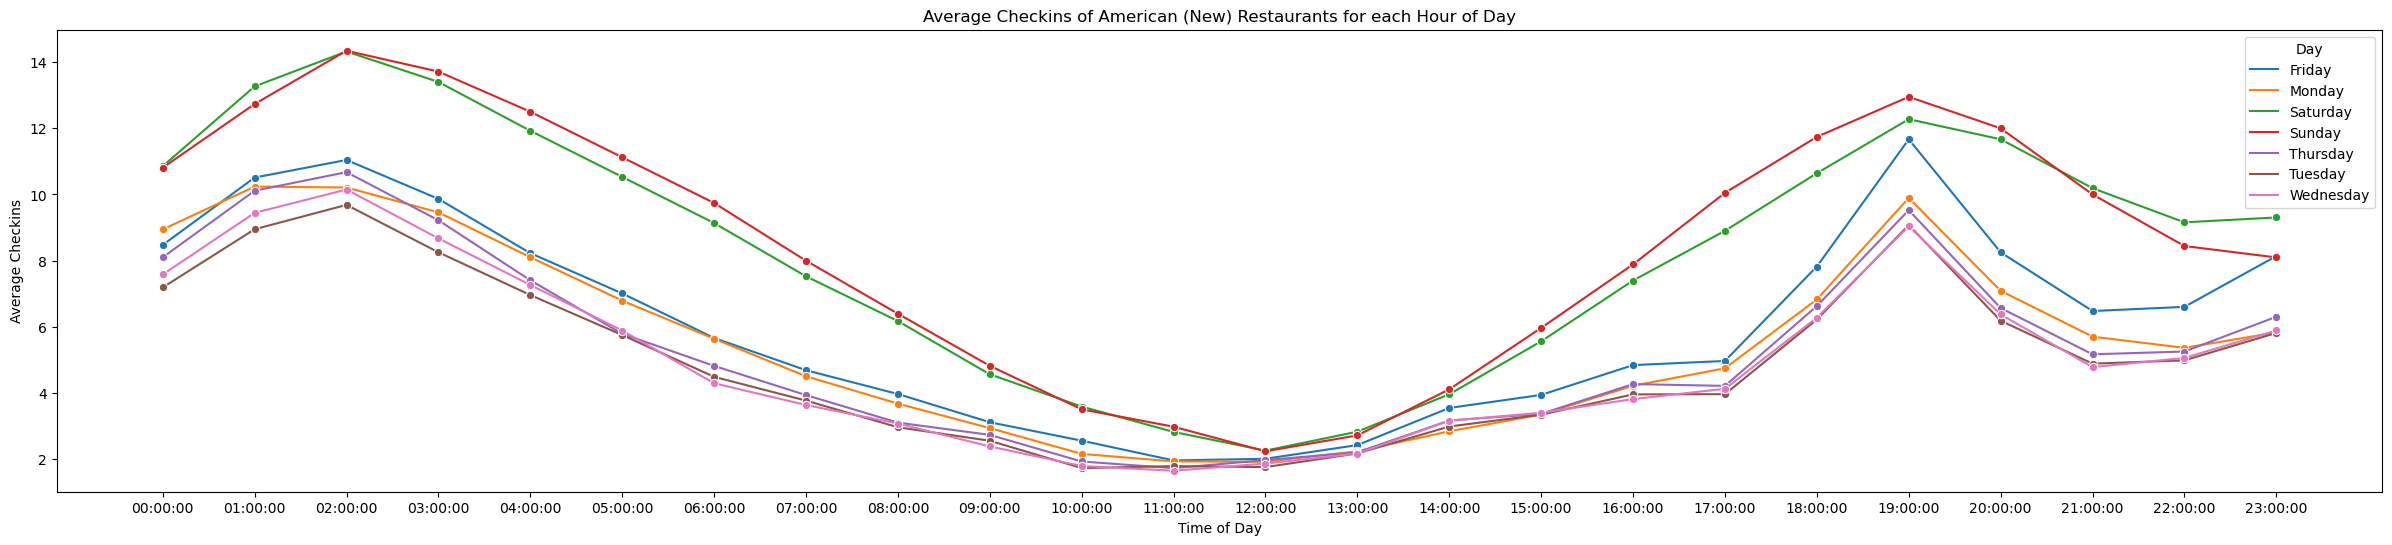

In [377]:
# Second Plot:


# Apply the filter for is_restaurant and categories


# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'day', 'Time of Day', 'Average Duration'. Average Duration is the mean duration time
# for the particular hour of that day.
plot2_df['Time of Day'] = plot2_df['Time of Day'].astype(str)

plt.figure(figsize=(30, 6))
sns.lineplot(data=plot2_df, 
             x='Time of Day', 
             y='checkins', 
             hue='Day', 
             marker='o',
             ci = None)

plt.title('Average Checkins of American (New) Restaurants for each Hour of Day')
plt.ylabel('Average Checkins')
plt.xlabel('Time of Day')

# Now just plot the graph
